In [1]:
import pandas as pd
import os
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import textwrap

##### 1. 目前整理到444号境外输入病例。
##### 2. oo_file为深圳市卫建委公众号病例通报内容+深圳市政府平台开放数据结合整理的表格。没有提供。

In [11]:
oo_file = 'C://Users//Chen Shuo//Documents//20200215_CoVtry//20200321//20200321_境外输入整理.xlsx'
oo = pd.read_excel(oo_file).T
oo.head()

,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-10 00:00:00,2020-01-12 00:00:00,2020-01-27 00:00:00,2020-02-07 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,...,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
418,NaN,NaN,NaN,NaN,NaN,NaN,境外出行|伦敦飞香港(CX250),境内抵达|13:27抵达香港机场; 15:30渡轮(3A109)从香港抵达深圳蛇口码头; 随...,发病|上午出现发热咳嗽，由其妻子送医院核酸初筛阳性,确诊|市疾控复核阳性,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,NaN,NaN,境外出行|前往西班牙旅游,NaN,NaN,NaN,NaN,NaN,NaN,境外出行|西班牙飞中国(EY0050); 于阿联酋转机(EY0888),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,NaN,NaN,NaN,NaN,NaN,"境外出行|出差前往香港飞法国巴黎(CX261), 自述同事有发热症状",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,境外出行|深圳经香港飞瑞士,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 以418为例的个人轨迹
temp = oo.loc[418,oo.loc[418,:].notnull()]
temp
# [temp.str.split('|')[i][0] for i in temp.index.tolist()]

2020-02-27                                    境外出行|伦敦飞香港(CX250)
2020-02-28    境内抵达|13:27抵达香港机场; 15:30渡轮(3A109)从香港抵达深圳蛇口码头; 随...
2020-02-29                            发病|上午出现发热咳嗽，由其妻子送医院核酸初筛阳性
2020-03-01                                           确诊|市疾控复核阳性
Name: 418, dtype: object

In [13]:
# 把string分割开来，这样在plotly中显示不会太长一条
temp.apply(lambda txt: '<br>'.join(textwrap.wrap(str(txt),width=14)))

2020-02-27                                境外出行|伦敦飞香港(CX2<br>50)
2020-02-28    境内抵达|13:27抵达香港<br>机场; 15:30渡轮(3A<br>109)从香港抵达深...
2020-02-29                        发病|上午出现发热咳嗽，由其<br>妻子送医院核酸初筛阳性
2020-03-01                                           确诊|市疾控复核阳性
Name: 418, dtype: object

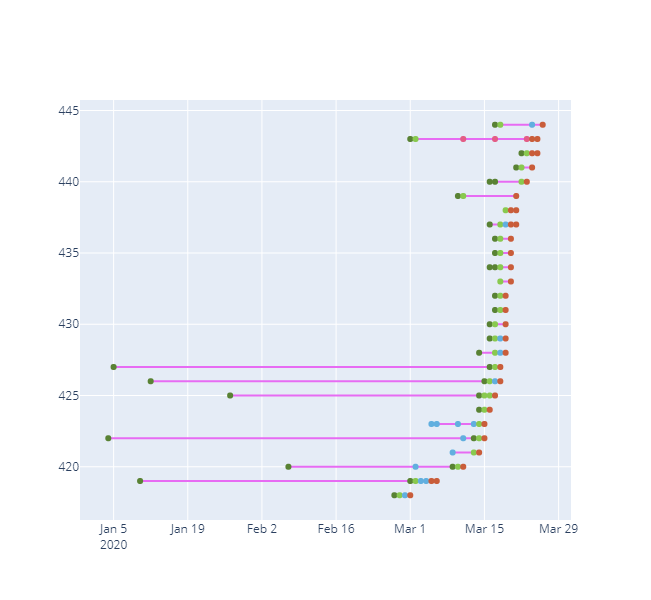

In [19]:
time_point_color = {'境外出行':'rgb(89,130,52)',
                    '境内抵达':'rgb(137,201,79)',
                    '发病':'rgb(97,175,223)',
                    '确诊':'rgb(201,93,58)',
                    '事件':'rgb(227,93,134)'}
trace_list = []

for i in oo.index.tolist(): # every individual
    i_way = oo.loc[i,oo.loc[i,:].notnull()]
    time_point_list = [i_way.str.split('|')[i][0] for i in i_way.index.tolist()]
    notes = i_way.apply(lambda txt: '<br>'.join(textwrap.wrap(str(txt),width=14)))

    trace_list.append(
        go.Scatter(x=i_way.index.tolist(),
                   y=[i]*i_way.shape[0],
                   mode='markers+lines',
                   marker=dict(color=[time_point_color[time_point] for time_point in time_point_list],
                               size=6),
                   line=dict(color='rgb(231,107,243)', width=2),
                   connectgaps=True,
                   showlegend=False,
                   hovertemplate=
                     '<br><b>caseID</b>: %{y}<br>'+
                     '<br>%{text}',
                   text=notes,
                   name=i)
    )

fig = go.Figure(trace_list)
fig.update_layout(autosize=False, height=600,width=700)
fig.show()